# **Predicting Wine Class Using KNN Classifier Algorithm**

## **Introduction**

Our topic is centered around the composition of wine. The dataset we are using collected results of “chemical analysis” of wine grown by different people within a singular region in Italy (Dua et al., 2019). In this dataset, there are 13 different columns, which are variables indicating the different measures of composition of wine. Namely, these variables are Alcohol, Malic Acid, Ash, Alkalinity of ash, Magnesium, Total Phenols, Flavonoids, Non-Flavonoid Phenols, Proanthocyanidins, Color intensity, Hue, OD280/OD315 of diluted wines and Proline. There are three different types of wine classes observed in this dataset, and they have been numbered 1,2 or 3 under the column “Class”. The predictive question we will aim to answer is: Given a composition of wine, predict which class, from the 3 possible ones in this dataset, that particular wine belongs to. There are no missing values for any of the variables in this dataset.


## **Methods & Results**

For our research question, we did a KNN classification analysis. To start our analysis, we loaded in the relevant libraries and read in the data from the source using the “read_delim” function. Since the dataset didn’t have any column names, we added columns names specified by the source to the data frame. We also set the class column as a factor for our analysis. There is no missing data in the data set as stated by the source.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
install.packages("BBmisc")
library(BBmisc)
install.packages("corrplot")
library(corrplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
wine_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", col_names = FALSE) |>
    mutate(X1 = as_factor(X1))
colnames(wine_data) <- c("class","alcohol", "malic.acid", "ash", "alcalinity.of.ash","magnesium", "total.phenols",
                         "flavanoids", "nonfalvanoid.phenols", "proanthocyanins", "color.intensity", "hue",
                         "OD280.OD315.of.diluted.wines", "proline")
head(wine_data)

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280.OD315.of.diluted.wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


**Table 1.** A table showing the first six rows of the wine data set. There are 178 observations in the set.

Here, we see that there are indeed three classes of wine in the dataset.

In [3]:
wine_data |>
    pull(class) |>
    levels()

[1] "1" "2" "3"

Next, we proceeded to split the dataset into a training dataset and a testing one to the ratio of 0.75 to 0.25 respectively and stratified according to class. We set the seed according to our group number.

In [4]:
set.seed(117)
wine_split <- initial_split(wine_data, prop = 0.75, strata = class)  
wine_training <- training(wine_split)   
wine_testing <- testing(wine_split)
head(wine_training)

class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280.OD315.of.diluted.wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


**Table 2.** A table showing the first six rows of the training data set for the model. There are 133 observations in the training set.

In [5]:
head(wine_testing)

class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280.OD315.of.diluted.wines,proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
1,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310
1,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
1,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990


**Table 3.** A table showing the first six rows of the testing data set for the model. There are 45 observations in the testing set.

Next, to explore our data set, we took the training data set and calculated some summary statistics. We created new data frames called “wine_min”, “wine_max”, “wine_mean”, and ”wine_sd”, which correspond to minimum, maximum, mean, and standard deviation of each attribute respectively. We combined all of the columns mentioned above to “wine_stats” to observe the different values of the attributes of wine.

In [6]:
wine_mean <- wine_training |>
    summarise(across(alcohol:proline, mean)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'mean') 
wine_min <- wine_training |>
    summarise(across(alcohol:proline, min)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'min') 
wine_max <- wine_training |>
    summarise(across(alcohol:proline, max)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'max') 
wine_sd <- wine_training |>
    summarise(across(alcohol:proline, sd)) |>
    pivot_longer(cols = alcohol:proline,
                 names_to = 'attribute',
                 values_to = 'sd') 

wine_stats <- wine_min |>
    bind_cols(wine_max |> select(max)) |>
    bind_cols(wine_mean |> select(mean)) |>
    bind_cols(wine_sd |> select(sd))

wine_stats

attribute,min,max,mean,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
alcohol,11.03,14.83,12.9967669,0.8092089
malic.acid,0.74,5.80,2.3468421,1.1367047
ash,1.70,3.23,2.3693233,0.2805357
alcalinity.of.ash,11.20,30.00,19.5812030,3.2520192
magnesium,78.00,162.00,100.3834586,14.3652157
total.phenols,1.10,3.85,2.3036090,0.6265035
flavanoids,0.47,5.08,2.0595489,0.9888169
nonfalvanoid.phenols,0.14,0.66,0.3624812,0.1251085
proanthocyanins,0.42,3.58,1.5960150,0.5675612


**Table 4.** Summary statistics for each wine attribute.

To see how many observations were in each class of wine in the training set, we created “wine_proportions” by grouping the observations by class, counting them, then calculating a percentage based on the total number of observations in the training set. From the table, we can see that the classes are relatively balanced so we do not need to proceed with any balancing.

In [7]:
num_obs <- nrow(wine_training)

wine_proportions <- wine_training |>
    group_by(class) |>
    summarize(count = n(), percentage = n() / num_obs * 100)
wine_proportions

class,count,percentage
<fct>,<int>,<dbl>
1,44,33.08271
2,53,39.84962
3,36,27.06767


**Table 5.** Proportions and counts of each class of wine in the training data set.

To look at the correlation between each variable in the training data, we first scaled the data and normalized the it using the BBMisc library.

In [8]:
wine_training_corr <- data.frame(wine_training[,-1])
wine_training_scaled <- wine_training_corr %>% mutate_all(~(scale(.) %>% as.vector))
wine_training_normal <- wine_training_scaled %>% mutate_all(~(normalize(., method = "range", range = c(0, 1)) %>% as.vector))
head(wine_training_normal)

,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280.OD315.of.diluted.wines,proline
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.8421053,0.1916996,0.4771242,0.2340426,0.5833333,0.6181818,0.5618221,0.2692308,0.5917722,0.3720137,0.4552846,0.9706960,0.5613409
2,0.5710526,0.2055336,0.2875817,0.0000000,0.2619048,0.5636364,0.4967462,0.2307692,0.2721519,0.2645051,0.4634146,0.7802198,0.5506419
3,0.5605263,0.3201581,0.6339869,0.3936170,0.2738095,0.6181818,0.6008677,0.3076923,0.7563291,0.3754266,0.4471545,0.6959707,0.6469330
4,0.8789474,0.2391304,0.5228758,0.2978723,0.4166667,1.0000000,0.6550976,0.1923077,0.5569620,0.5563140,0.3089431,0.7985348,0.8573466
5,0.5815789,0.3656126,0.7647059,0.5212766,0.4761905,0.6181818,0.4815618,0.4807692,0.4430380,0.2593857,0.4552846,0.6080586,0.3259629
6,0.8842105,0.2233202,0.4901961,0.1808511,0.2142857,0.5090909,0.4446855,0.3076923,0.4936709,0.3387372,0.4390244,0.8461538,0.7218260


**Table 6.** The first six rows of the scaled and normalized training data.

After standardizing and normalizing, we plotted a correlation plot using the corrplot library to view the relationships between each variable. There may be overfitting if we use all the attributes as predictors in our analysis so we decided to pick six attributes that are clearly chemical compounds. These attributes are alcohol, malic acid, magnesium, flavanoids, nonflavanoid phenols and proline.

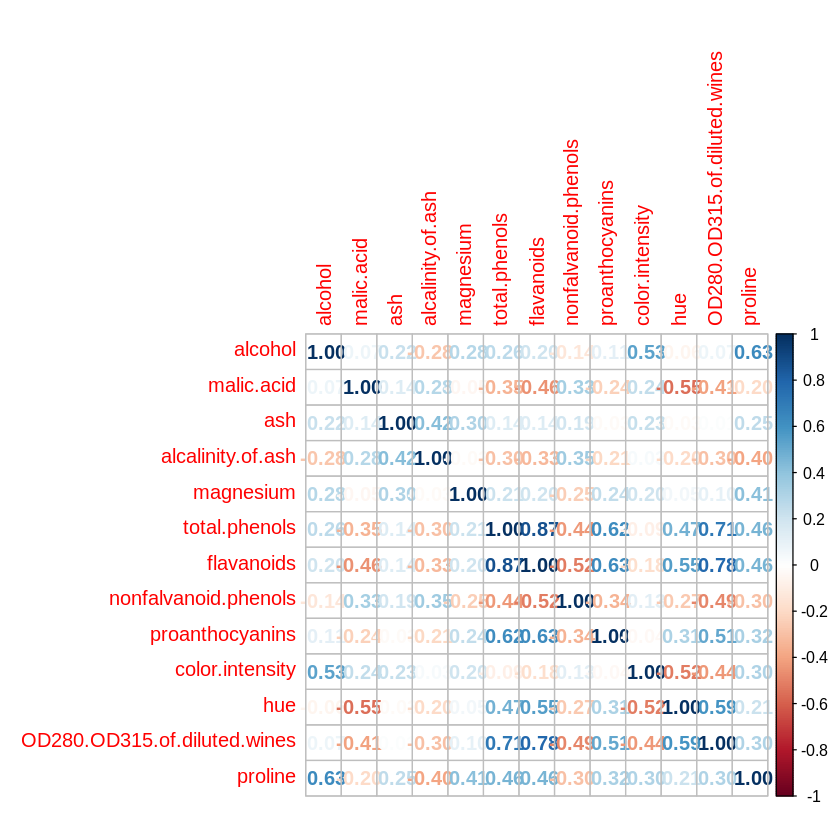

In [9]:
correlation_matrix <- round(cor(wine_training_normal), 2)
corrplot(correlation_matrix, method="number")

**Figure 1.** Correlation plot showing the relationship between each variable in the training data set.

It is difficult to visualize a plot with multiple variables so we selected two attributes to see if there are groupings of those variables according to class. To do this, we created a scatter plot using the alcohol and malic acid attributes and colored the points using class.

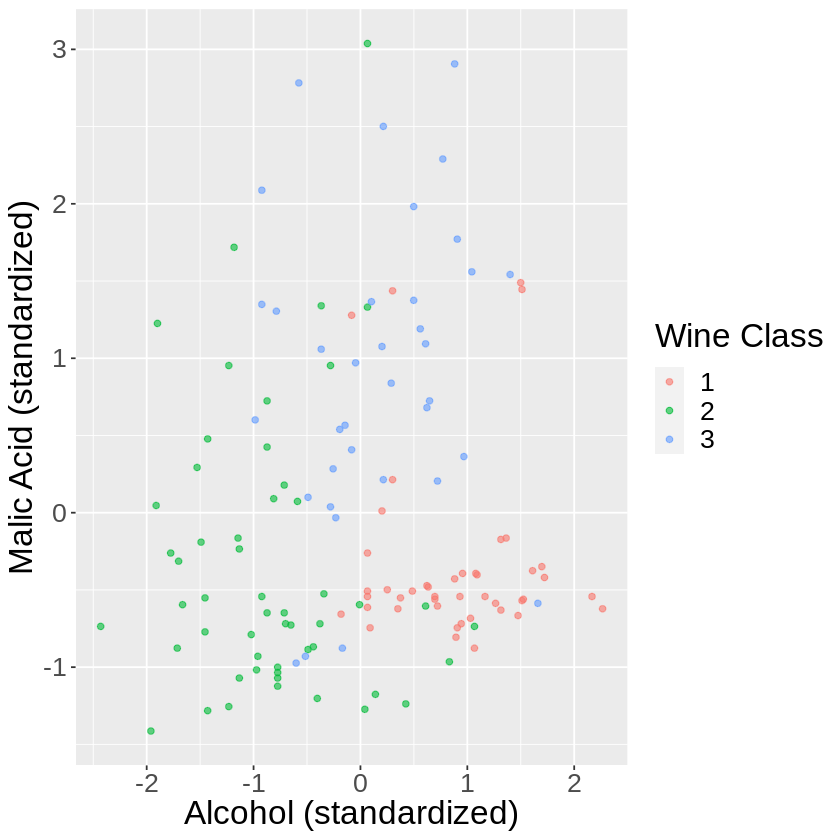

In [10]:
class_labels = data.frame(select(wine_training, "class"))
wine_plot <- wine_training_scaled |>
  bind_cols(class_labels) |>
  ggplot(aes(x = alcohol, y = malic.acid, color = class)) +
  geom_point(alpha = 0.6) +
  labs(x = "Alcohol (standardized)", y = "Malic Acid (standardized)", color = "Wine Class") +
  theme(text = element_text(size = 20))
wine_plot

**Figure 2.** Scatter plot of alcohol (standardized) and malic acid (standardized).

After exploring the data set, we proceeded with using the KNN algorithm. First, we need to determine the parameter K for our analysis. We first scaled and centered the training data set and set the model specification to tune the model for K. As the data set is not very large, the range of K we decided to go with was from 1 to 50 in increments of 2. We then selected a 10-fold cross-validation to evaluate the accuracy of the model.

In [11]:
wine_recipe <- recipe(class ~ alcohol + malic.acid + proline + magnesium + flavanoids + nonfalvanoid.phenols, data = wine_training)|>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_values <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

wine_vfold <- vfold_cv(wine_training, v = 10, strata = class)


We calculated the results after putting the above specifications into a workflow and collected the accuracy measures for each K.

In [12]:
knn_results <- workflow() |>
  add_recipe(wine_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = wine_vfold, grid = k_values) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean))

head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,accuracy,multiclass,0.9716667,10,0.01532568,Preprocessor1_Model02
7,accuracy,multiclass,0.9506410,10,0.01779467,Preprocessor1_Model04
5,accuracy,multiclass,0.9489744,10,0.01506894,Preprocessor1_Model03
9,accuracy,multiclass,0.9423077,10,0.01716651,Preprocessor1_Model05
1,accuracy,multiclass,0.9351648,10,0.01594160,Preprocessor1_Model01
11,accuracy,multiclass,0.9201648,10,0.01543781,Preprocessor1_Model06


**Table 7.** Table of the top six K with the highest accuracy measurements.

Here we plotted all the K values we tested along with their accuracy to better compare the values and choose the best K. As we can see, our accuracy is highest when we have K = 3.

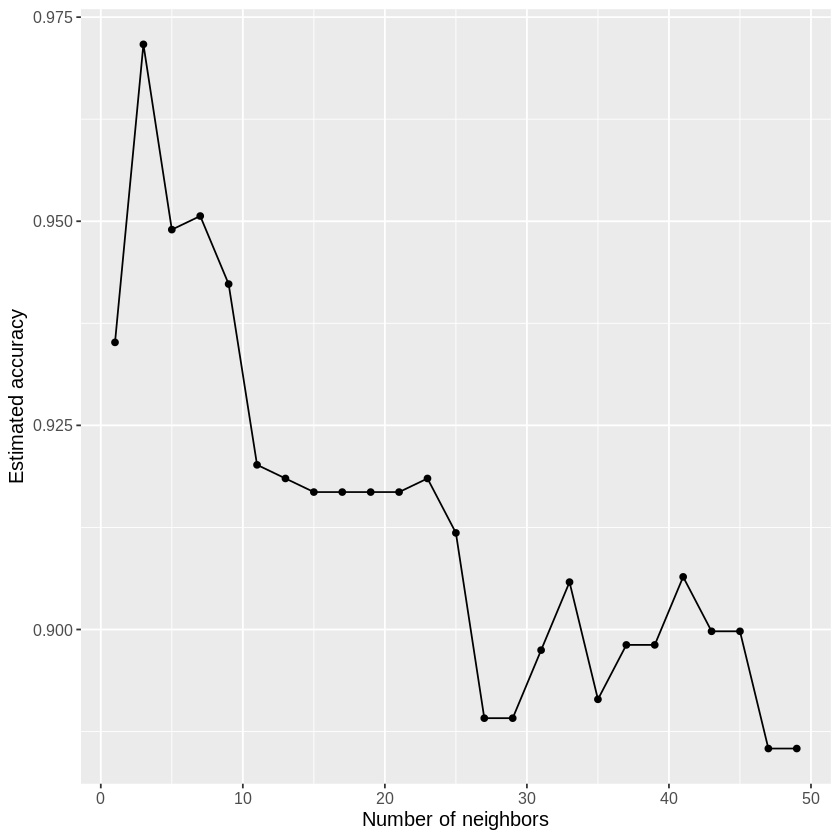

In [13]:
accuracy_vs_k_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Number of neighbors", y = "Estimated accuracy") + 
  theme(text = element_text(size = 12))
accuracy_vs_k_plot

**Figure 3.** Plot of the K number of neighbours and estimated accuracy with 10-fold cross-validation.

We retrained our model specification with K=3 and fitted the model to the training data set.

In [14]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(wine_recipe) |>
  add_model(knn_spec) |>
  fit(data = wine_training)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.05263158
Best kernel: rectangular
Best k: 3

We then used the model to predict on the testing data set.

In [15]:
wine_test_predictions <- predict(knn_fit, wine_testing) |>
    bind_cols(wine_testing)
head(wine_test_predictions)

.pred_class,class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonfalvanoid.phenols,proanthocyanins,color.intensity,hue,OD280.OD315.of.diluted.wines,proline
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,1,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
1,1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
1,1,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310
1,1,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
1,1,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990


**Table 8.** Table showing the first six predictions of the testing set.

To see how many correct predictions there were, we created a confusion matrix. From the matrix, we can see that the class 1 wines were all correctly predicted. For class 2 wines, there were 15 correct predictions and 3 that were incorrectly predicted as class 3. For class 3 wines, there were 11 correct predictions and 1 observation that was incorrectly classified as class 2.

In [16]:
confusion <- wine_test_predictions |>
             conf_mat(truth = class, estimate = .pred_class)
confusion

          Truth
Prediction  1  2  3
         1 15  0  0
         2  0 15  1
         3  0  3 11

By calculating the metrics on our predictions, we found our model to have an accuracy of 91%.

In [17]:
wine_test_predictions |>
    metrics(truth = class, estimate = .pred_class) |>
    filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9111111


**Table 9.** Table of the prediction accuracy of our KNN model with K=3.

Supposed we want to predict a particular class of alcohol using our desired input for these wine attributes (alcohol, malic acid, proline, magnesium, flavanoids, nonflavenoid phenols). We created a new observation and predicted the class using our classifier. The observation was predicted to be a class 2 wine.

In [18]:
new_obs <- tibble(alcohol = 5, malic.acid = 2, proline = 1000, magnesium = 100, flavanoids  = 2.00, nonfalvanoid.phenols = 3)
predict(knn_fit, new_obs)

.pred_class
<fct>
2


**Table 10.** Predicted wine class of a new observation.

## **Discussion**

Our model is able to predict the wine class with an accuracy of 91%. A new random observation was then classified as wine class 2. These findings are what we expected to find. Such findings could help wine companies manufacture different types of wines according to their composition. Future questions could be about determining which types of wine are easier to produce based on composition. Such findings can also help determine the kinds of wine which taste best after storing them because the kinds of temperature under which wine is stored can alter its original composition (Scrimgeour et al., 2015).  Another important question would be to determine compositions of wine which are the safest or healthiest to consume. The consumption of alcohol, such as ones produced at home or illegally, could have negative health effects if it contains impurities or other substances which are bad for the body (Castroita et al., 2020). 


## **References**


1. Dua, D. and Graff, C. (2019) Wine Data Set, UCI Machine Learning Repository. University of California, Irvine, School of Information and Computer Sciences. Available at: http://archive.ics.uci.edu/ml (Accessed: 2022). 

2. Castriota, S., Ashenfelter, O., Turnbull, J., MITPressDirect 2020 Collection, MIT Press Direct to Open Backfile HSS Monographs, & MIT Press Direct OA. (2020). Wine economics. Chapter 1, Page (10) The MIT Press. https://doi.org/10.7551/mitpress/11106.001.0001

3. Scrimgeour, N., Nordestgaard, S., Lloyd, N. D. R., & Wilkes, E. N. (2015). Exploring the effect of elevated storage temperature on wine composition. Australian Journal of Grape and Wine Research, 21(S1), 713-722. https://doi.org/10.1111/ajgw.12196
